In [40]:
import pandas as pd
from pathlib import Path
import json
import seaborn as sns
import matplotlib.pyplot as plt
from Levenshtein import distance

parent_path = Path("/data/jgut/msa-tests")
df = pd.read_csv(parent_path/"porter_data.csv", header=None)

def open_ost(ost_path:Path):
    if not ost_path.exists():
        return -1, -1, -1, -1, -1, -1 ,-1
    with open(ost_path) as json_data:
        score_json = json.load(json_data)
    lddt = score_json["lddt"] if "lddt" in score_json else 0
    bb_lddt = score_json["bb_lddt"] if "bb_lddt" in score_json else 0
    tm_score = score_json["tm_score"] if "tm_score" in score_json else 0
    inconsistent_residues = score_json["inconsistent_residues"] if "inconsistent_residues" in score_json else -1
    length = len(score_json["local_lddt"]) if "local_lddt" in score_json else -1
    model_bad_bonds = len(score_json["reference_bad_bonds"]) if "reference_bad_bonds" in score_json else -1
    model_bad_angles = len(score_json["reference_bad_angles"]) if "reference_bad_angles" in score_json else -1
    return lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles

def open_secstruc(secstruc_path:Path):
    if not secstruc_path.exists():
        return None, None, -1, -1, -1, -1
    with open(secstruc_path) as json_data:
        json_dict = json.load(json_data)
    secstruc_string = "".join(json_dict["secstruc"])
    sequence_string = "".join(json_dict["residues"])
    gap_total = json_dict["-_total"]
    gap_relative = json_dict["-_rel"]
    return secstruc_string, sequence_string, len(secstruc_string), len(sequence_string), gap_total, gap_relative

In [41]:
scores = []
for it, row in list(df.iterrows()):
    struc_a = row[0]
    struc_b = row[1]
    case_name = struc_a+struc_b
    case_path = parent_path/"aaa_porter_all_models/porter_all_models"/case_name
    for comparison in [struc_a, struc_b]:
        full_path = list(case_path.glob(f"{comparison}*_sec_struc.json"))[0]
        #full_secstruc_string, full_sequence_string, full_len_secstruc_string, full_len_sequence_string, full_gap_total, full_gap_relative = open_secstruc(full_path)
        comparison_path = case_path/f"{comparison}_prot_dir_af3"
        for file_path in comparison_path.glob("*score.json"):
            lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(file_path)
            #curr_secstruc_string, curr_sequence_string, curr_len_secstruc_string, curr_len_sequence_string, curr_gap_total, curr_gap_relative = 
            if lddt>0:
                rank = 6 #int(str(file_path).split("rank_")[1][0:3])
                model = int(str(file_path).split("-it-")[1][0])
                curr_entry = {"struc":comparison, "rank":rank, "model":model, "lDDT": lddt,"BB-lDDT":bb_lddt,  "tm": tm_score, "inconsistent_residues": inconsistent_residues, "length": length,  "bad_bonds":  model_bad_bonds,  "bad_angles":  model_bad_angles, "Sequences":"Synthetic", "Model":"AlphaFold 3"}
                scores.append(curr_entry)
        comparison_path = case_path/f"{comparison}_prot_dir"
        for file_path in comparison_path.glob("*score.json"):
            lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(file_path)
            #curr_secstruc_string, curr_sequence_string, curr_len_secstruc_string, curr_len_sequence_string, curr_gap_total, curr_gap_relative = open_secstruc(Path(str(file_path)[:-len("score.json")]+"sec_struc.json"))
            if lddt>0:
                rank = int(str(file_path).split("rank_")[1][0:3])
                model = int(str(file_path).split("_model_")[1][0])
                curr_entry = {"struc":comparison, "rank":rank, "model":model, "lDDT": lddt,"BB-lDDT":bb_lddt,  "tm": tm_score, "inconsistent_residues": inconsistent_residues, "length": length,  "bad_bonds":  model_bad_bonds,  "bad_angles":  model_bad_angles, "Sequences":"Synthetic", "Model":"AlphaFold 2"}
                #levenshtein = distance(full_secstruc_string, curr_secstruc_string)
                #curr_entry = curr_entry | {"full_secstruc_string":full_secstruc_string, "full_sequence_string":full_sequence_string, "full_len_secstruc_string": full_len_secstruc_string, "full_len_sequence_string":full_len_sequence_string, "full_gap_total": full_gap_total, "full_gap_relative":full_gap_relative,"levenshtein": levenshtein,"levenshtein_ratio":levenshtein/full_len_sequence_string, "curr_secstruc_string":curr_secstruc_string, "curr_sequence_string":curr_sequence_string, "curr_len_secstruc_string": curr_len_secstruc_string, "curr_len_sequence_string":curr_len_sequence_string, "curr_gap_total": curr_gap_total, "curr_gap_relative":curr_gap_relative}
                scores.append(curr_entry)
        comparison_packed = case_path/f"{comparison}_score_dir_af3_nat"
        for file_path in comparison_packed.glob("*score.json"):
            lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(file_path)
            if lddt>0:
                rank = 6 #int(str(file_path).split("rank_")[1][0:3])
                model = int(str(file_path).split("-it-")[1][0])
                curr_entry = {"struc":comparison, "rank":rank, "model":model, "lDDT": lddt,"BB-lDDT":bb_lddt,  "tm": tm_score, "inconsistent_residues": inconsistent_residues, "length": length,  "bad_bonds":  model_bad_bonds,  "bad_angles":  model_bad_angles, "Sequences":"Natural", "Model":"AlphaFold 3"}
                scores.append(curr_entry)
        comparison_path = case_path/f"{comparison}_score_dir_af2_nat"
        for file_path in comparison_path.glob("1inp*score.json"):
            lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(file_path)
            #curr_secstruc_string, curr_sequence_string, curr_len_secstruc_string, curr_len_sequence_string, curr_gap_total, curr_gap_relative = open_secstruc(Path(str(file_path)[:-len("score.json")]+"sec_struc.json"))
            if lddt>0:
                rank = int(str(file_path).split("rank_")[1][0:3])
                model = int(str(file_path).split("_model_")[1][0])
                curr_entry = {"struc":comparison, "rank":rank, "model":model, "lDDT": lddt,"BB-lDDT":bb_lddt,  "tm": tm_score, "inconsistent_residues": inconsistent_residues, "length": length,  "bad_bonds":  model_bad_bonds,  "bad_angles":  model_bad_angles, "Sequences":"Natural", "Model":"AlphaFold 2"}
                #levenshtein = distance(full_secstruc_string, curr_secstruc_string)
                #curr_entry = curr_entry | {"full_secstruc_string":full_secstruc_string, "full_sequence_string":full_sequence_string, "full_len_secstruc_string": full_len_secstruc_string, "full_len_sequence_string":full_len_sequence_string, "full_gap_total": full_gap_total, "full_gap_relative":full_gap_relative,"levenshtein": levenshtein,"levenshtein_ratio":levenshtein/full_len_sequence_string, "curr_secstruc_string":curr_secstruc_string, "curr_sequence_string":curr_sequence_string, "curr_len_secstruc_string": curr_len_secstruc_string, "curr_len_sequence_string":curr_len_sequence_string, "curr_gap_total": curr_gap_total, "curr_gap_relative":curr_gap_relative,}
                scores.append(curr_entry)
        comparison_path = case_path/f"score_{comparison}_diff"
        for file_path in comparison_path.glob("*score.json"):
            lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(file_path)
            #curr_secstruc_string, curr_sequence_string, curr_len_secstruc_string, curr_len_sequence_string, curr_gap_total, curr_gap_relative = open_secstruc(Path(str(file_path)[:-len("score.json")]+"sec_struc.json"))
            if lddt>0:
                rank = int(str(file_path).split("rank_")[1][0:3])
                model = int(str(file_path).split("_model_")[1][0])
                curr_entry = {"struc":comparison, "rank":rank, "model":model, "lDDT": lddt,"BB-lDDT":bb_lddt,  "tm": tm_score, "inconsistent_residues": inconsistent_residues, "length": length,  "bad_bonds":  model_bad_bonds,  "bad_angles":  model_bad_angles, "Sequences":"Synthetic", "Model":"Remote homologs"}
                #levenshtein = distance(full_secstruc_string, curr_secstruc_string)
                #curr_entry = curr_entry | {"full_secstruc_string":full_secstruc_string, "full_sequence_string":full_sequence_string, "full_len_secstruc_string": full_len_secstruc_string, "full_len_sequence_string":full_len_sequence_string, "full_gap_total": full_gap_total, "full_gap_relative":full_gap_relative,"levenshtein": levenshtein,"levenshtein_ratio":levenshtein/full_len_sequence_string, "curr_secstruc_string":curr_secstruc_string, "curr_sequence_string":curr_sequence_string, "curr_len_secstruc_string": curr_len_secstruc_string, "curr_len_sequence_string":curr_len_sequence_string, "curr_gap_total": curr_gap_total, "curr_gap_relative":curr_gap_relative}
                scores.append(curr_entry)
    lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(case_path/"score_AA_RF.json")
    if lddt>0:
        rank = 6
        model = 0
        curr_entry = {"struc":struc_a, "rank":rank, "model":model, "lDDT": lddt,"BB-lDDT":bb_lddt,  "tm": tm_score, "inconsistent_residues": inconsistent_residues, "length": length,  "bad_bonds":  model_bad_bonds,  "bad_angles":  model_bad_angles, "Sequences":"Natural", "Model":"RoseTTAFold2"}
        scores.append(curr_entry)
    lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(case_path/"score_BB_RF.json")
    if lddt>0:
        rank = 6
        model = 0
        curr_entry = {"struc":struc_b, "rank":rank, "model":model, "lDDT": lddt,"BB-lDDT":bb_lddt,  "tm": tm_score, "inconsistent_residues": inconsistent_residues, "length": length,  "bad_bonds":  model_bad_bonds,  "bad_angles":  model_bad_angles, "Sequences":"Natural", "Model":"RoseTTAFold2"}
        scores.append(curr_entry)
        
    lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(case_path/"score_Aprot_rf.json")
    if lddt>0:
        rank = 6
        model = 0
        curr_entry = {"struc":struc_a, "rank":rank, "model":model, "lDDT": lddt,"BB-lDDT":bb_lddt,  "tm": tm_score, "inconsistent_residues": inconsistent_residues, "length": length,  "bad_bonds":  model_bad_bonds,  "bad_angles":  model_bad_angles, "Sequences":"Synthetic", "Model":"RoseTTAFold2"}
        scores.append(curr_entry)
    lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(case_path/"score_Bprot_rf.json")
    if lddt>0:
        rank = 6
        model = 0
        curr_entry = {"struc":struc_b, "rank":rank, "model":model, "lDDT": lddt,"BB-lDDT":bb_lddt,  "tm": tm_score, "inconsistent_residues": inconsistent_residues, "length": length,  "bad_bonds":  model_bad_bonds,  "bad_angles":  model_bad_angles, "Sequences":"Synthetic", "Model":"RoseTTAFold2"}
        scores.append(curr_entry)
lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(case_path/"score_Bprot_rf.json")
curr_entry = {"struc":struc_b, "rank":6, "model":0, "lDDT": lddt,"BB-lDDT":bb_lddt,  "tm": tm_score, "inconsistent_residues": inconsistent_residues, "length": length,  "bad_bonds":  model_bad_bonds,  "bad_angles":  model_bad_angles, "Sequences":"Synthetic", "Model":"RoseTTAFold2"}
scores.append(curr_entry)

In [42]:
pd.set_option('display.max_columns', None)
scores = pd.DataFrame(scores)
#sec_struc_df = pd.read_csv(parent_path/"sec_struc.csv")
#sec_struc_df["struc"] = sec_struc_df["pdb_path"].str.slice(18,23)
#sec_struc_df = sec_struc_df.set_index("struc")
#scores = scores.join(sec_struc_df[["-_total", "-_rel"]], on="struc")
all_strucs = [struc for struc in df[0]]+[struc for struc in df[1]]
af3_nat_strucs = scores[(scores["Model"]=="AlphaFold 3")&(scores["Sequences"]=="Natural")].struc.unique()
print(f"AF3 nat missing:{set(all_strucs)-set(af3_nat_strucs)}")
af3_prot_strucs = scores[(scores["Model"]=="AlphaFold 3")&(scores["Sequences"]=="Synthetic")].struc.unique()
print(f"AF3 prot missing:{set(all_strucs)-set(af3_prot_strucs)}")
af2_nat_strucs = scores[(scores["Model"]=="AlphaFold 2")&(scores["Sequences"]=="Natural")].struc.unique()
print(f"AF2 nat missing:{set(all_strucs)-set(af2_nat_strucs)}")
af2_prot_strucs = scores[(scores["Model"]=="AlphaFold 2")&(scores["Sequences"]=="Synthetic")].struc.unique()
print(f"AF2 prot missing:{set(all_strucs)-set(af2_prot_strucs)}")
rf_nat_strucs = scores[(scores["Model"]=="RoseTTAFold2")&(scores["Sequences"]=="Natural")].struc.unique()
print(f"RF nat missing:{set(all_strucs)-set(rf_nat_strucs)}")
rf_prot_strucs = scores[(scores["Model"]=="RoseTTAFold2")&(scores["Sequences"]=="Synthetic")].struc.unique()
print(f"RF prot missing:{set(all_strucs)-set(rf_prot_strucs)}")

AF3 nat missing:set()
AF3 prot missing:set()
AF2 nat missing:set()
AF2 prot missing:set()
RF nat missing:{'4cmqB', '4zt0C'}
RF prot missing:{'4cmqB', '4zt0C'}


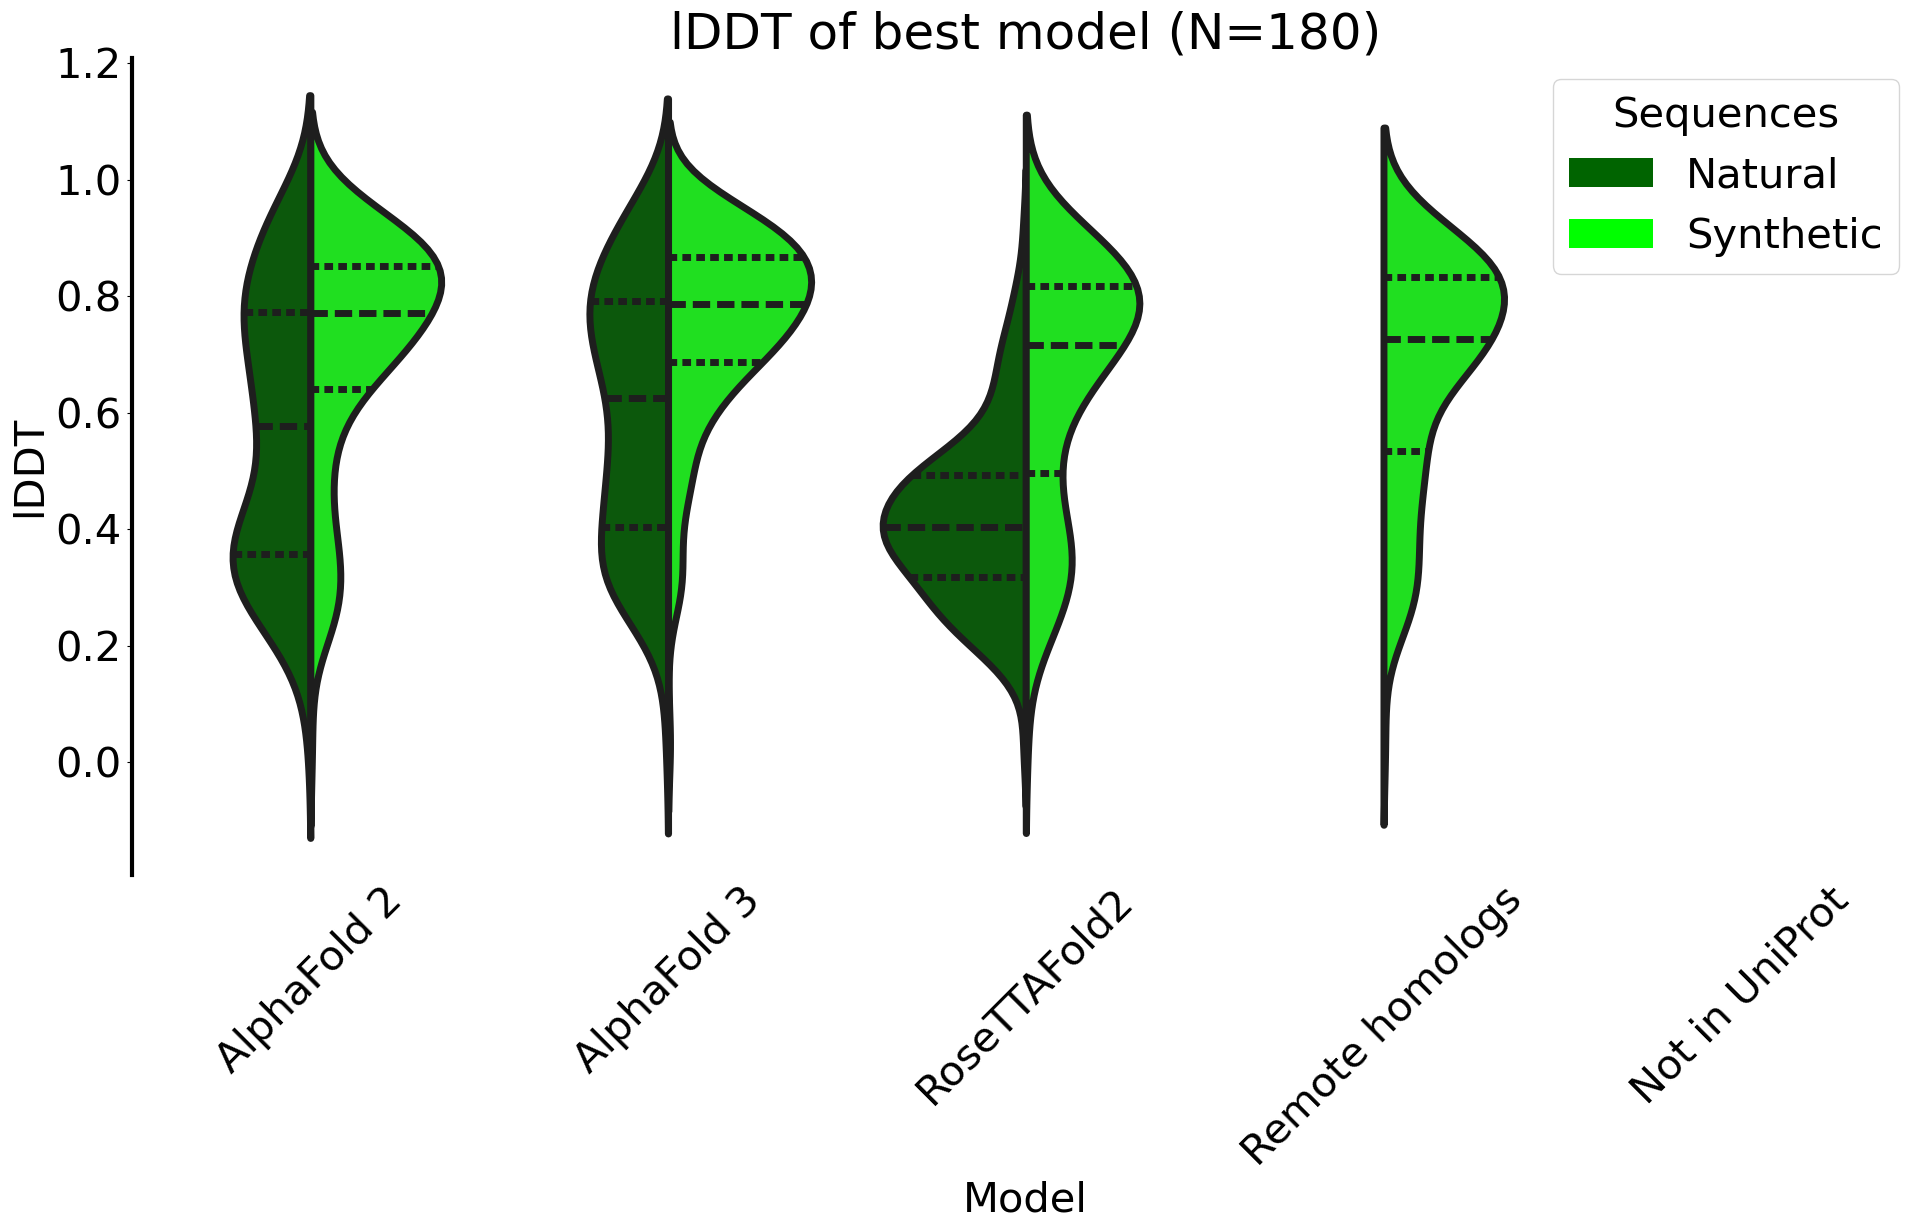

<Figure size 2000x1300 with 0 Axes>

In [48]:
import matplotlib
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["axes.spines.bottom"] = False
matplotlib.rcParams["axes.spines.left"] = True
plt.rcParams["figure.figsize"] = (20,13)
plt.rcParams['font.size'] = 30
plt.setp(plt.gca().spines.values(), linewidth=3)

sns.violinplot(scores.groupby(["struc","Model", "Sequences"]).agg("max"), x="Model", y="lDDT", hue="Sequences", split=True, inner="quart", order=["AlphaFold 2", "AlphaFold 3", "RoseTTAFold2", "Remote homologs","Not in UniProt" ], palette=["darkgreen", "lime"], linewidth=5)
handles = [mpatches.Patch(facecolor="darkgreen", label="Natural"), mpatches.Patch(facecolor="lime", label="Synthetic")]
plt.legend(handles=handles, title="Sequences")
plt.xticks(rotation=45)
plt.tick_params(axis=u'x', which=u'both',length=0)
plt.title("lDDT of best model (N=180)")
plt.tight_layout()
plt.savefig("visualisations/lDDT_best_model.svg", format="svg", dpi=600, transparent=True)
plt.show()
plt.clf()


We get 140/180.
mmSeqs gets 0/180.
Together we get 142/180.


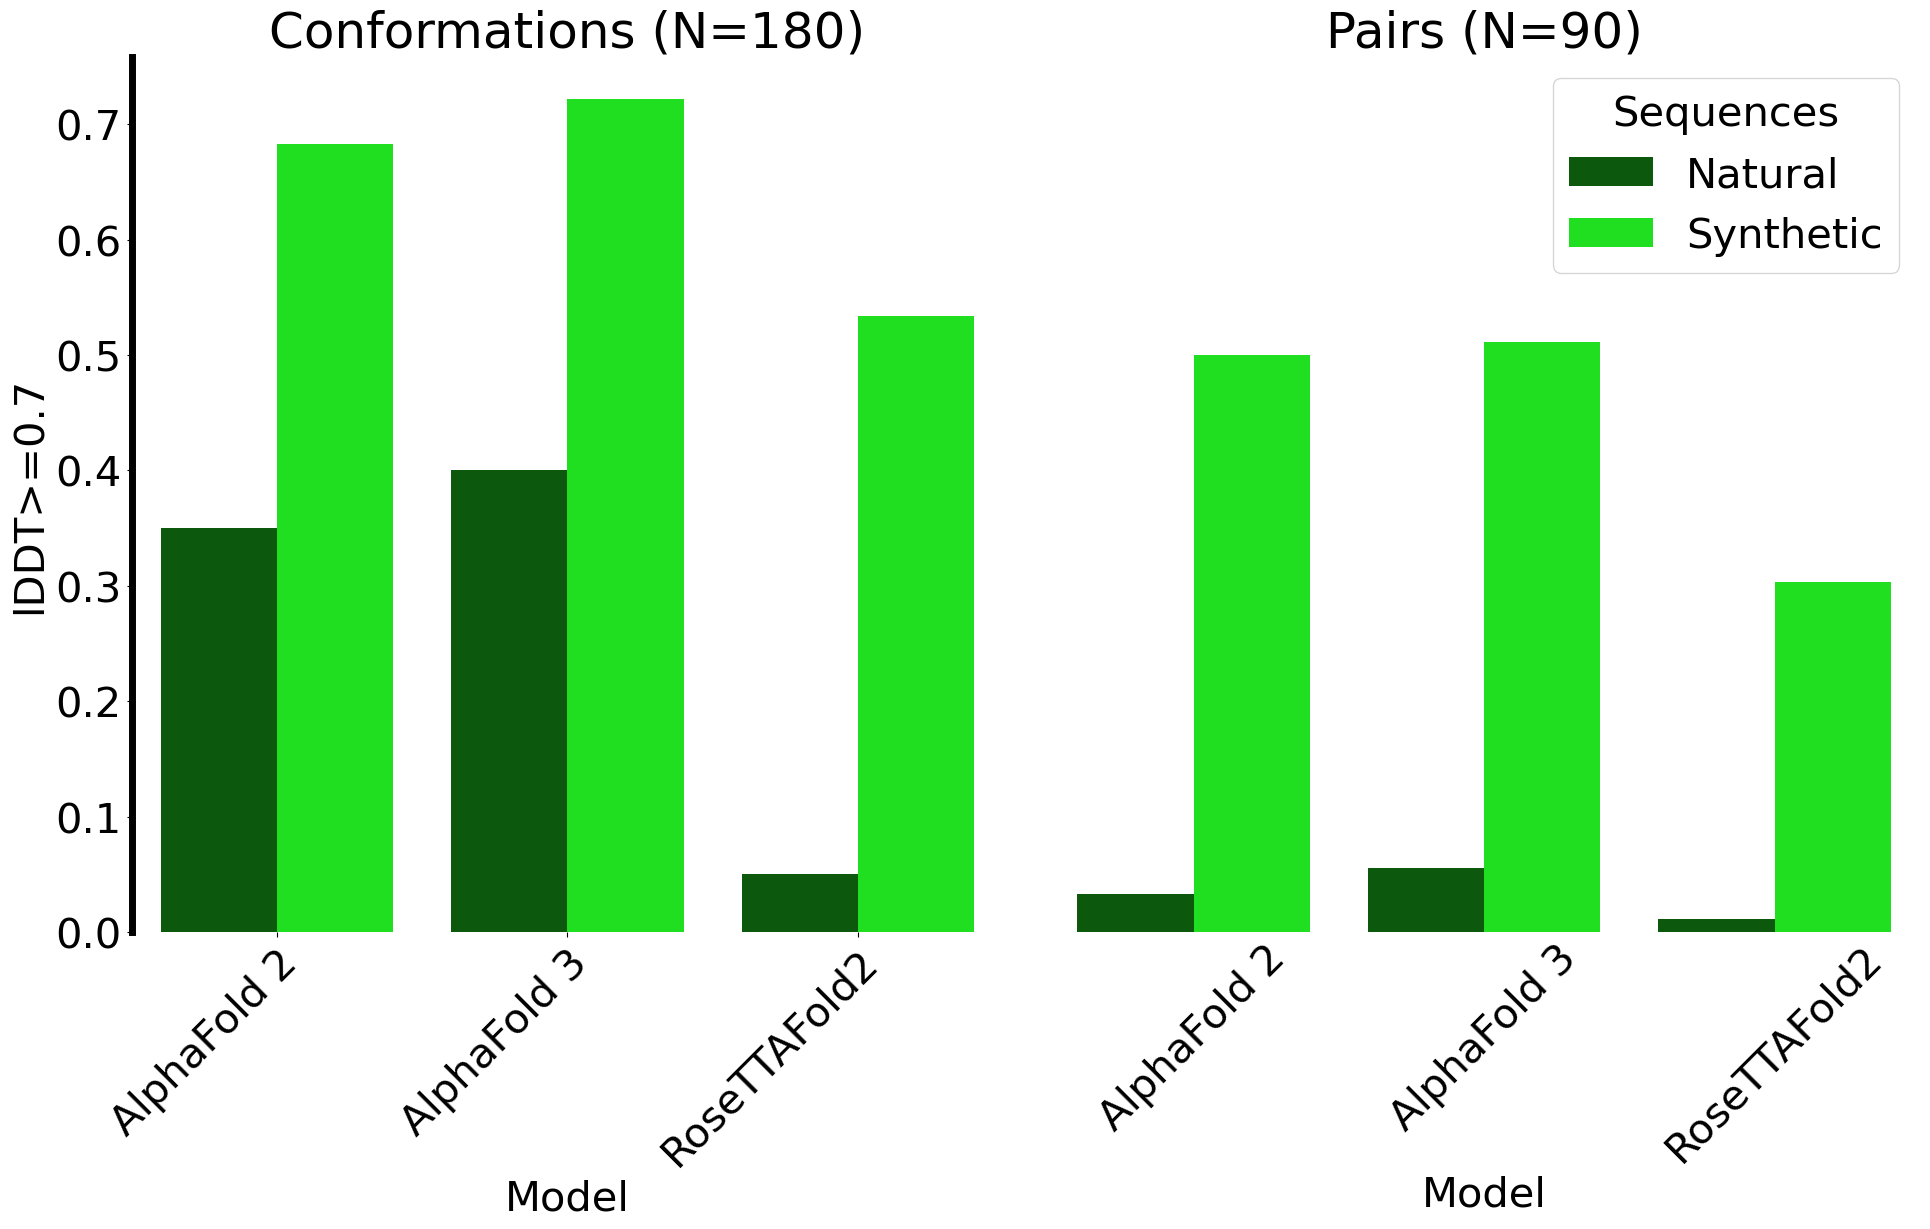

We get 55.0/90 pairs.
mmSeqs gets 6.0/90 pairs.
Together we get 55.0/90 pairs.
not found strucs


,rank,model,lDDT,BB-lDDT,tm,inconsistent_residues,length,bad_bonds,bad_angles,Sequences,Model,lDDT>=0.7
struc,,,,,,,,,,,,
1kctA,6,5,0.695,0.776,0.792,[],375,39,116,Synthetic,RoseTTAFold2,False
1mbyA,6,5,0.658,0.693,0.532,[],75,2,2,Synthetic,RoseTTAFold2,False
1mnmA,6,5,0.596,0.860,0.362,"[A.2.-A.2., A.3.-A.3., A.4.-A.4., A.6.-A.6., A...",85,3,19,Synthetic,RoseTTAFold2,False
1mnmB,6,5,0.326,0.865,0.364,"[A.1.-A.1., A.2.-A.2., A.4.-A.4., A.5.-A.5., A...",81,4,21,Synthetic,RoseTTAFold2,False
1nqdA,6,5,0.670,0.709,0.711,"[A.1.-A.1., A.2.-A.2., A.3.-A.3., A.4.-A.4., A...",111,7,43,Synthetic,RoseTTAFold2,False
1qlnA,6,5,0.360,0.649,0.318,[],862,11,37,Synthetic,RoseTTAFold2,False
1xtgB,6,5,0.597,0.690,0.487,[],59,0,11,Synthetic,RoseTTAFold2,False
2axzA,6,5,0.657,0.723,0.843,"[A.292.-A.292., A.294.-A.294., A.295.-A.295., ...",300,1,6,Synthetic,RoseTTAFold2,False
2jmrA,6,5,0.650,0.782,0.342,[],179,3,12,Synthetic,RoseTTAFold2,False


<Figure size 2000x1300 with 0 Axes>

In [44]:
plt.rcParams["figure.figsize"] = (20,13)
plt.rcParams['font.size'] = 30
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax1.spines.values(), linewidth=5)
ax1.spines[["left"]].set_visible(True)
scores["lDDT>=0.7"] = scores["lDDT"]>=0.7
sns.barplot(scores.groupby(["struc","Sequences", "Model"]).agg("max"), x="Model", y="lDDT>=0.7", hue="Sequences", errorbar=None,palette=["darkgreen", "lime"], order=["AlphaFold 2", "AlphaFold 3", "RoseTTAFold2"],ax=ax1)
plt.tick_params(axis=u'x', which=u'both',length=0)
ax1.set_title("Conformations (N=180)")
ax1.get_legend().remove()

print(f'We get {sum(scores[(scores["Sequences"]=="Synthetic")][["Sequences","struc","lDDT>=0.7"]].groupby(["struc","Sequences"]).agg("max")["lDDT>=0.7"])}/180.')
print(f'mmSeqs gets {sum(scores[scores["Sequences"]=="Organic"].groupby(["struc","Sequences"]).agg("max")["lDDT>=0.7"])}/180.')
print(f'Together we get {sum(scores[["Sequences","struc","lDDT>=0.7"]].groupby(["struc"]).agg("max")["lDDT>=0.7"])}/180.')

def find_match(row, df, matches, success_cat):
    curr_struc = row["struc"]
    other_struc = matches[curr_struc]
    other_success = df[(df["struc"]==other_struc) & (df["Sequences"]==row["Sequences"]) & (df["Model"]==row["Model"])][["Model","Sequences","struc",success_cat]].groupby("struc").agg("max")[success_cat]
    if other_success.any():
        return row[success_cat] and other_success.item()
    return False

matches = {row[1][0]: row[1][1] for row in df.iterrows()} | {row[1][1]: row[1][0] for row in df.iterrows()}
grouped = scores[["Model","Sequences","struc","lDDT>=0.7"]].groupby(["struc","Sequences", "Model"], as_index=False).agg("max")
grouped["lDDT>=0.7"] = [find_match(row[1], grouped, matches, "lDDT>=0.7")  for row in grouped.iterrows()]
sns.barplot(grouped.groupby(["struc","Sequences", "Model"]).agg("max"), x="Model", y="lDDT>=0.7", errorbar=None, hue="Sequences",palette=["darkgreen", "lime"], order=["AlphaFold 2", "AlphaFold 3", "RoseTTAFold2"],ax=ax2)
plt.xticks(rotation=45)
ax2.spines[['right', 'top', "left"]].set_visible(False)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.title("Pairs (N=90)")
plt.tight_layout()
plt.savefig("visualisations/lDDT_accpeted.svg", format="svg", dpi=600, transparent=True)
plt.show()
plt.clf()

print(f'We get {sum(grouped[grouped["Sequences"]=="Synthetic"].groupby(["struc","Sequences"]).agg("max")["lDDT>=0.7"])/2}/90 pairs.')
print(f'mmSeqs gets {sum(grouped[grouped["Sequences"]=="Natural"].groupby(["struc","Sequences"]).agg("max")["lDDT>=0.7"])/2}/90 pairs.')
print(f'Together we get {sum(grouped.groupby(["struc"]).agg("max")["lDDT>=0.7"])/2}/90 pairs.')
print("not found strucs")
grp = scores.groupby(["struc"]).agg("max")
grp[~(grp["lDDT>=0.7"])]

In [16]:
import pandas as pd
from pathlib import Path
import json
import seaborn as sns
import matplotlib.pyplot as plt
from Levenshtein import distance
anchor_path = Path("/data/jgut/msa-tests/single_protein_test")
deshaw_path = anchor_path/"DEShaw_examples"
negative_path = anchor_path/"Negative_examples"
single_proteins_df = pd.read_csv("single_proteins.csv", names=["dataset", "first", "second", "start_offset", "end_offset"])

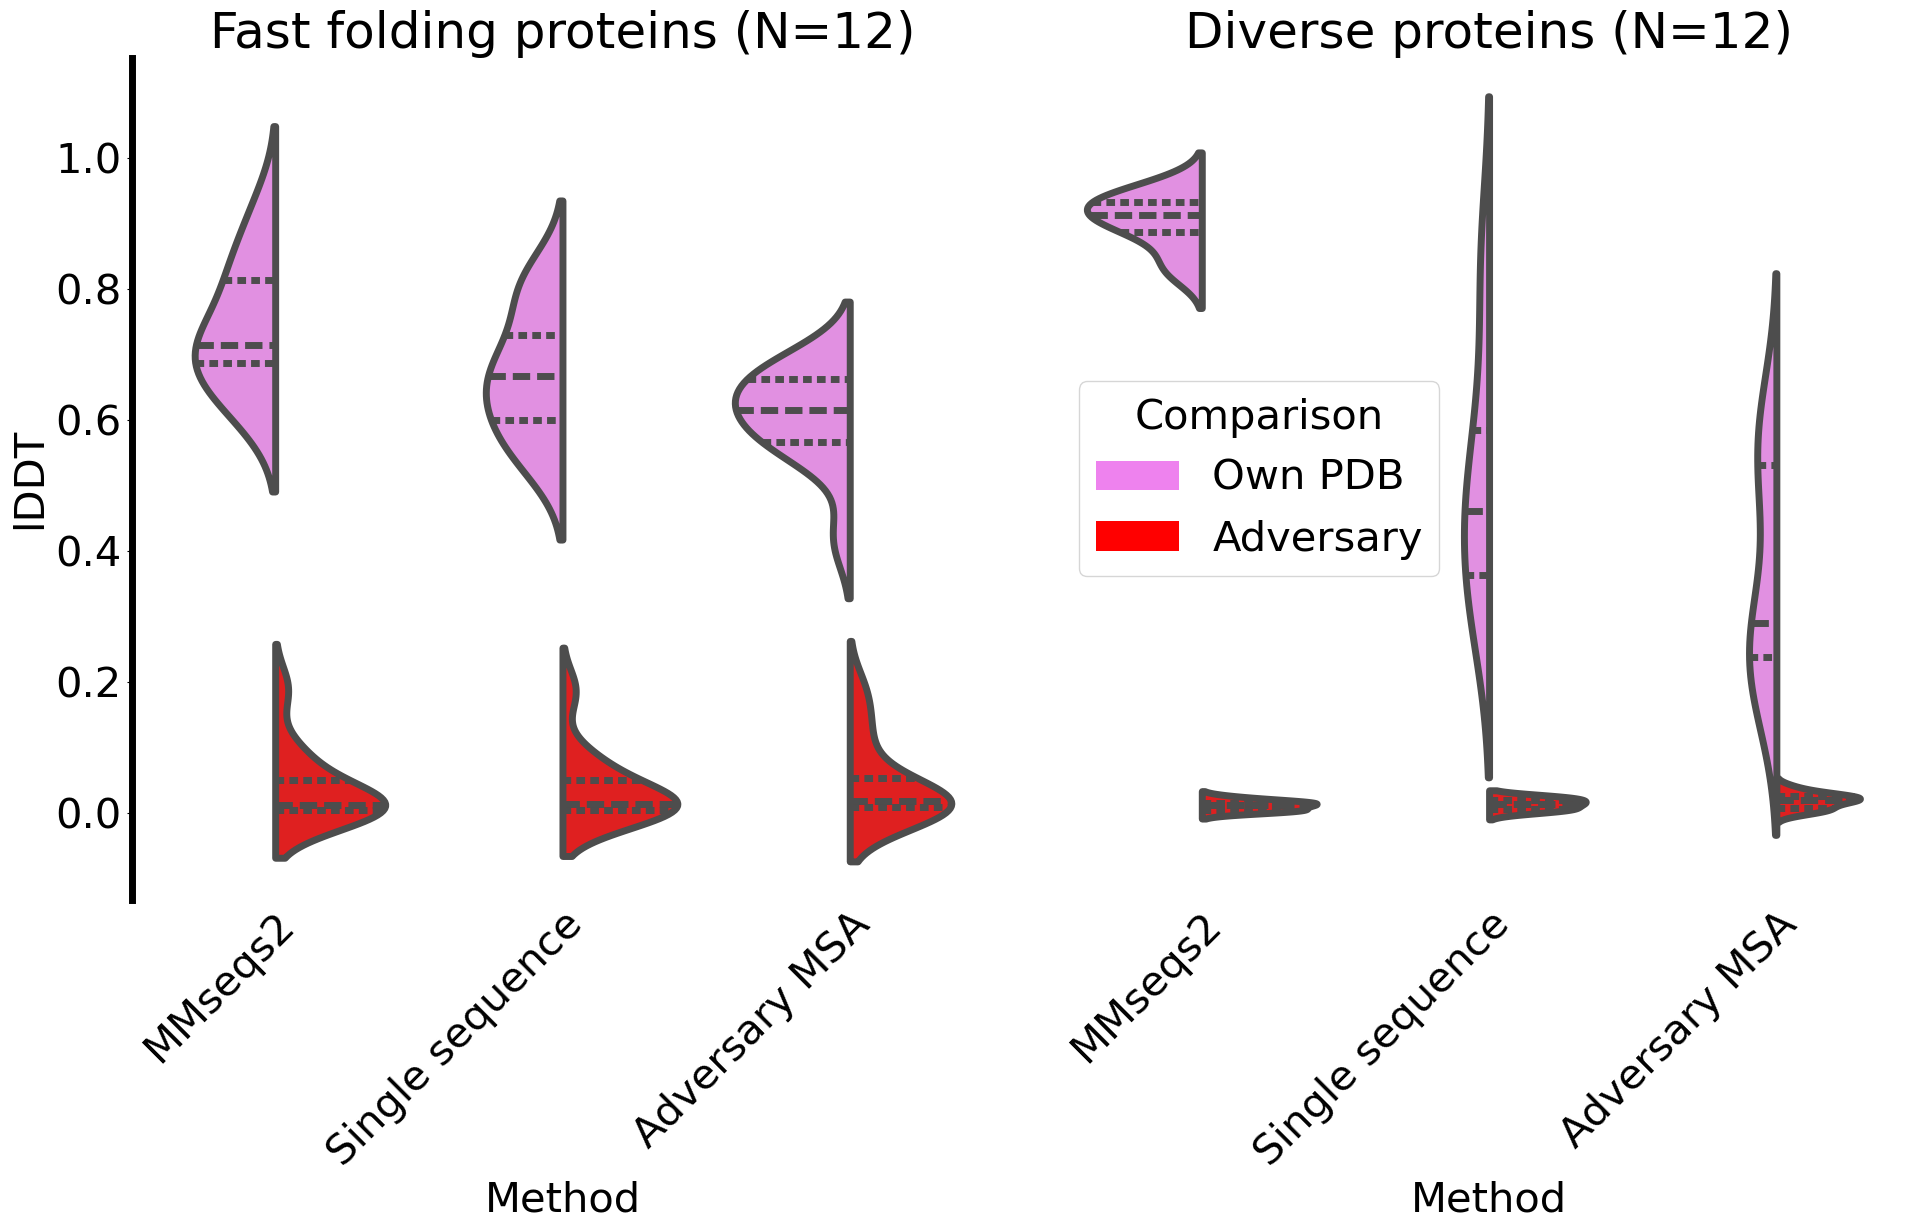

<Figure size 2000x1300 with 0 Axes>

<Figure size 2000x1300 with 0 Axes>

In [50]:
import matplotlib.patches as  mpatches

def open_ost(ost_path:Path):
    if not ost_path.exists():
        return -1, -1, -1, -1, -1, -1 ,-1
    with open(ost_path) as json_data:
        score_json = json.load(json_data)
    lddt = score_json["lddt"] if "lddt" in score_json else 0
    bb_lddt = score_json["bb_lddt"] if "bb_lddt" in score_json else 0
    tm_score = score_json["tm_score"] if "tm_score" in score_json else 0
    inconsistent_residues = score_json["inconsistent_residues"] if "inconsistent_residues" in score_json else -1
    length = len(score_json["local_lddt"]) if "local_lddt" in score_json else -1
    model_bad_bonds = len(score_json["reference_bad_bonds"]) if "reference_bad_bonds" in score_json else -1
    model_bad_angles = len(score_json["reference_bad_angles"]) if "reference_bad_angles" in score_json else -1
    return lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles

deshaw_examples = single_proteins_df[single_proteins_df.dataset=="DEShaw_examples"]
deshaw_scores = []
for _, row in deshaw_examples.iterrows():
    first = row["first"]
    second = row["second"]
    combined_name = first+second
    for identifier, path_sub in [("MMseqs2", f"{first}_full"), ("Single sequence", f"{first}_single"), ("Adversary MSA", f"{first}_main_{second}_protmpnn")]:
        lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(deshaw_path/combined_name/path_sub/f"score_{first}.json")
        deshaw_scores.append({"struc":first,"Method":identifier, "lDDT": lddt, "Comparison":"Own PDB"})
        lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(deshaw_path/combined_name/path_sub/f"score_{second}.json")
        deshaw_scores.append({"struc":first,"Method":identifier, "lDDT": lddt, "Comparison":"Adversary"})
negative_df = pd.DataFrame(deshaw_scores)

plt.rcParams["figure.figsize"] = (20,13)
plt.rcParams['font.size'] = 30
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax1.spines.values(), linewidth=5)
ax1.spines[["left"]].set_visible(True)
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax2.spines.values(), linewidth=5)
ax2.spines[["left"]].set_visible(False)
plt.tick_params(axis=u'both', which=u'both',length=0)
sns.violinplot(negative_df, x="Method", y="lDDT",hue="Comparison",inner="quart", split=True, order=["MMseqs2", "Single sequence", "Adversary MSA"], palette=["violet", "red"],ax=ax1, linewidth=5)
ax1.get_legend().remove()
ax1.tick_params(axis=u'x', which=u'both',length=0)
ax1.set_title("Fast folding proteins (N=12)")
negative_examples = single_proteins_df[single_proteins_df.dataset=="Negative_examples"]
negative_scores = []
for _, row in negative_examples.iterrows():
    first = row["first"]
    second = row["second"]
    combined_name = first+second
    for identifier, path_sub in [("MMseqs2", f"{first}_full"), ("Single sequence", f"{first}_single"), ("Adversary MSA", f"{first}_main_{second}_protmpnn")]:
        lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(negative_path/combined_name/path_sub/f"score_{first}.json")
        negative_scores.append({"struc":first,"Method":identifier, "lDDT": lddt, "Comparison":"Own PDB"})
        lddt, bb_lddt, tm_score, inconsistent_residues, length, model_bad_bonds, model_bad_angles = open_ost(negative_path/combined_name/path_sub/f"score_{second}.json")
        negative_scores.append({"struc":first,"Method":identifier, "lDDT": lddt, "Comparison":"Adversary"})
negative_df = pd.DataFrame(negative_scores)
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax2.set_title("Diverse proteins (N=12)")
sns.violinplot(negative_df, x="Method", y="lDDT",hue="Comparison",inner="quart", split=True, order=["MMseqs2", "Single sequence", "Adversary MSA"], palette=["violet", "red"],ax=ax2, linewidth=5)
handles = [mpatches.Patch(facecolor="violet", label="Own PDB"), mpatches.Patch(facecolor="red", label="Adversary")]
plt.legend(handles=handles, title="Comparison")
plt.tight_layout()
plt.savefig("visualisations/negative_examples.svg", format="svg", dpi=600, transparent=True)
plt.show()
plt.gcf()

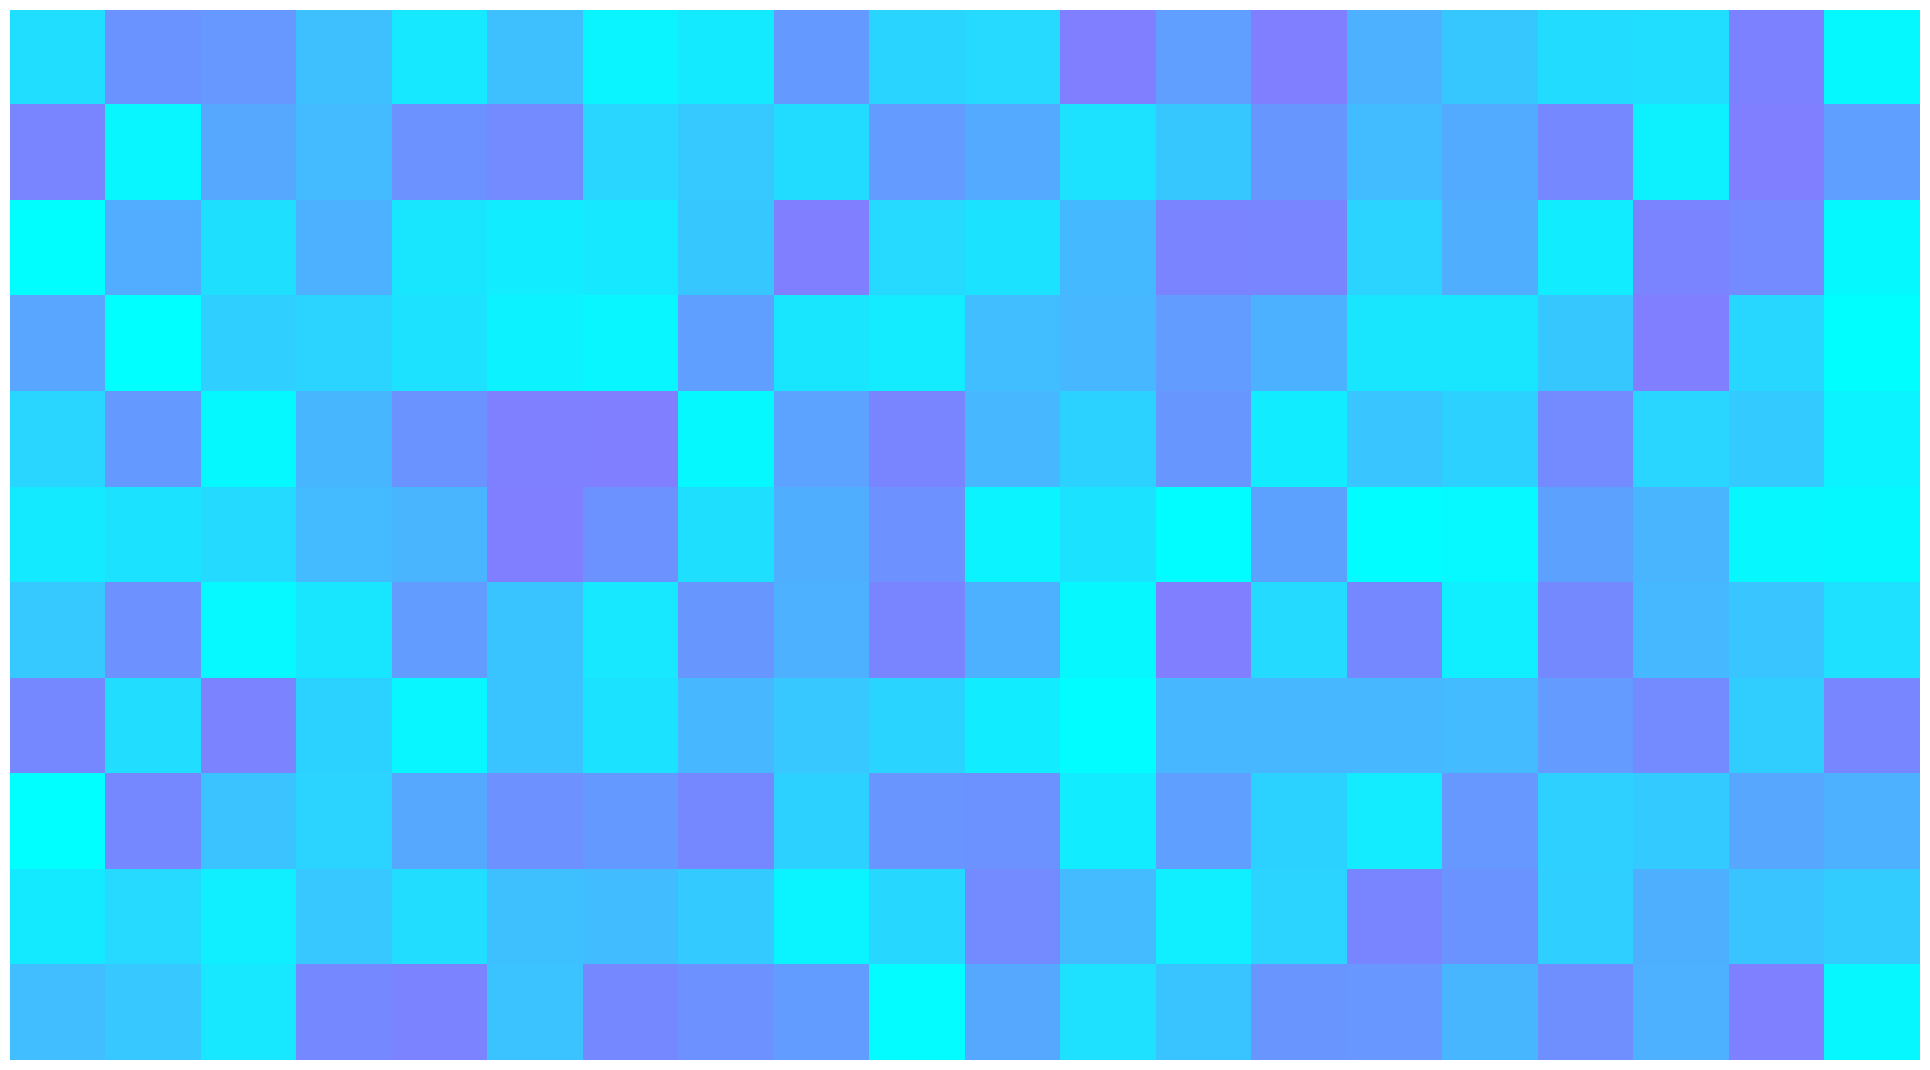

<Figure size 2000x1300 with 0 Axes>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


cmap = plt.get_cmap('cool')
lower_cmap = truncate_colormap(cmap, 0., 0.5)
img = np.random.rand(11,20)
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["axes.spines.bottom"] = False
matplotlib.rcParams["axes.spines.left"] = False
plt.tick_params(axis=u'both', which=u'both', labelbottom=False, labelleft=False,length=0)
g = plt.imshow(img, interpolation='nearest', cmap=lower_cmap)
plt.tight_layout()
plt.savefig("visualisations/msa_winter.svg", format="svg", dpi=600, transparent=True)
plt.show()
plt.clf()

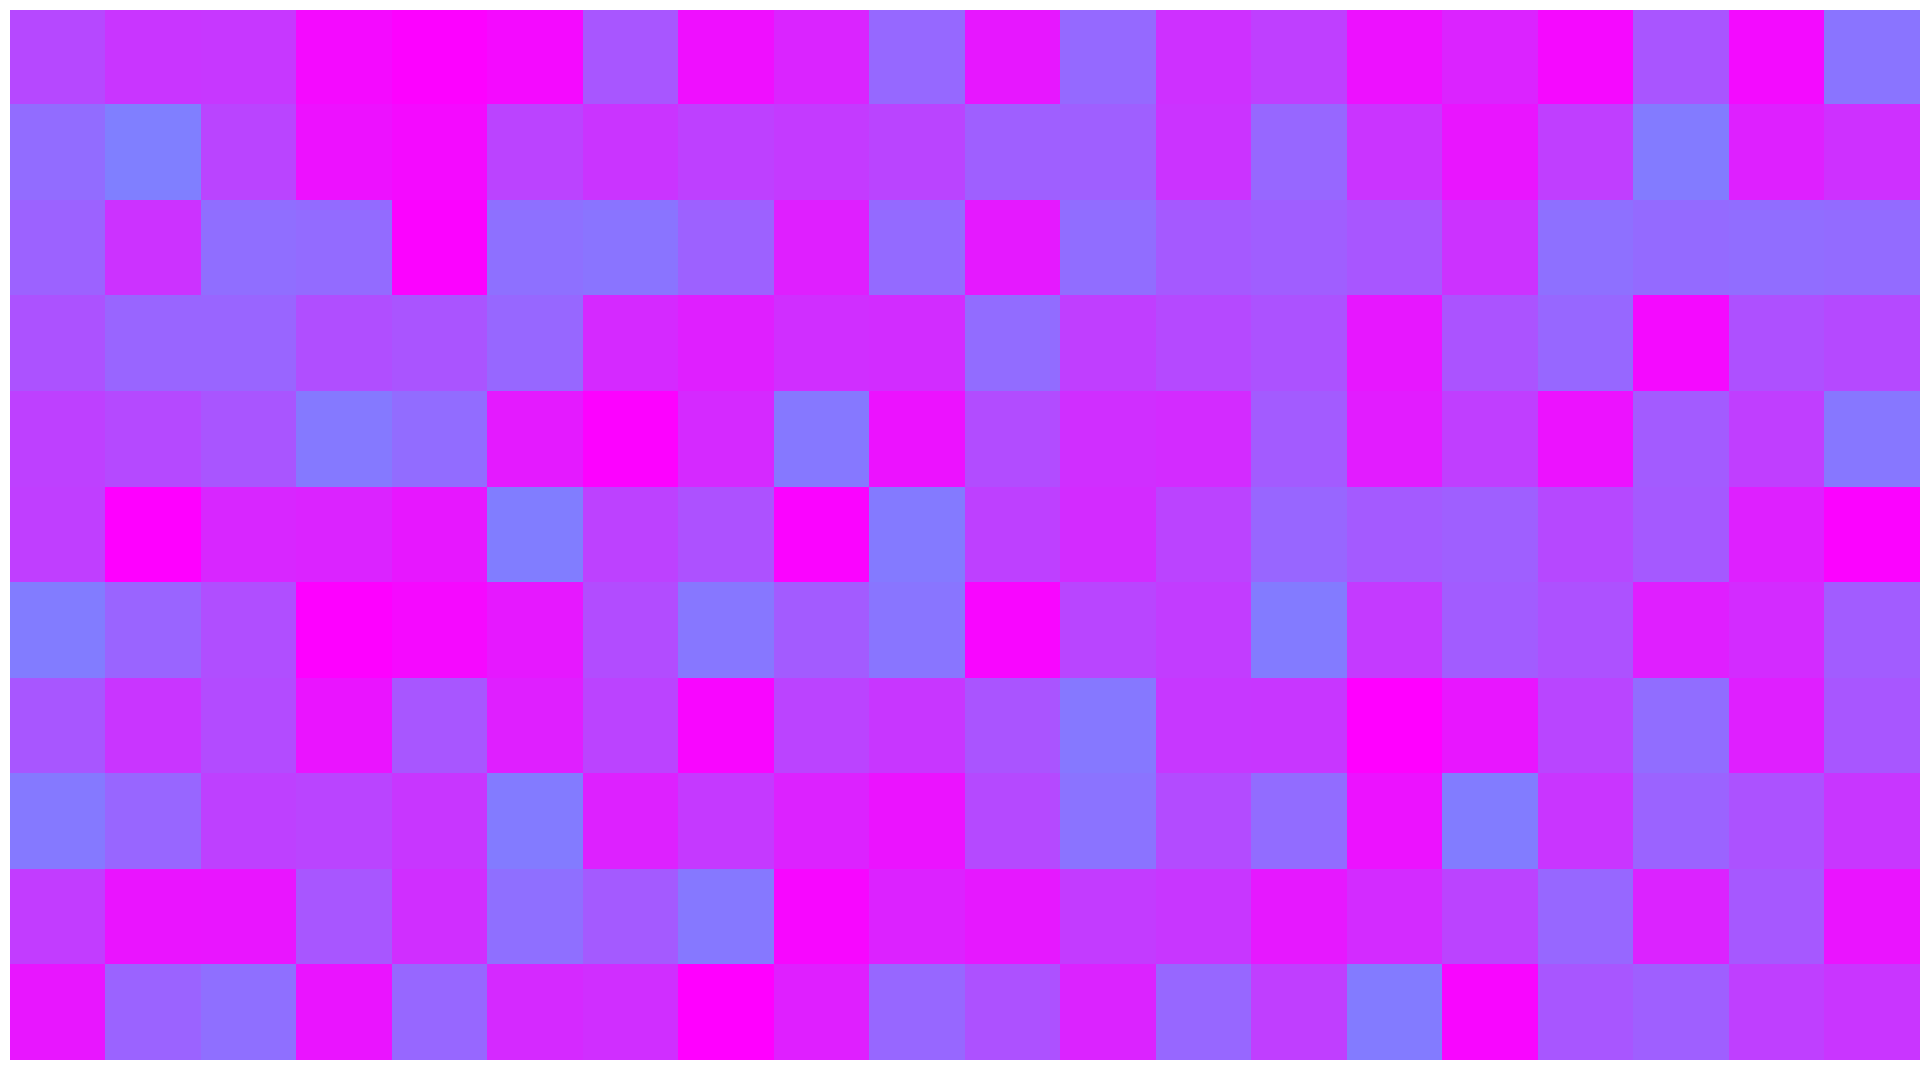

<Figure size 2000x1300 with 0 Axes>

In [38]:
plt.tick_params(axis=u'both', which=u'both', labelbottom=False, labelleft=False,length=0)
img = np.random.rand(11,20)
upper_cmap = truncate_colormap(cmap, 0.5,1)
g = plt.imshow(img, interpolation='nearest', cmap=upper_cmap)
plt.tight_layout()
plt.savefig("visualisations/msa_summer.svg", format="svg", dpi=600, transparent=True)
plt.show()
plt.clf()

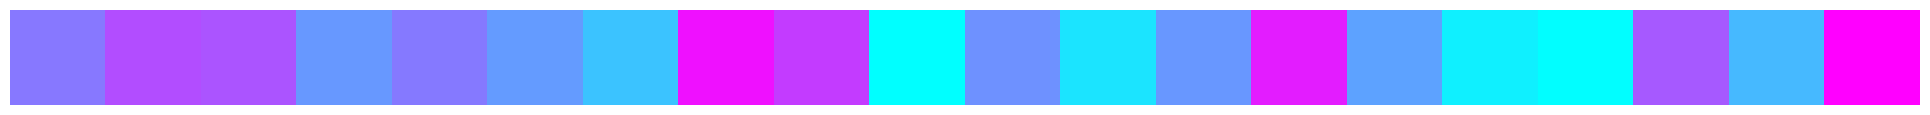

<Figure size 2000x1300 with 0 Axes>

In [39]:
plt.tick_params(axis=u'both', which=u'both', labelbottom=False, labelleft=False,length=0)
img = np.random.rand(1,20)
g = plt.imshow(img, interpolation='nearest', cmap=cmap)
plt.tight_layout()
plt.savefig("visualisations/msa_top.svg", format="svg", dpi=600, transparent=True)
plt.show()
plt.clf()

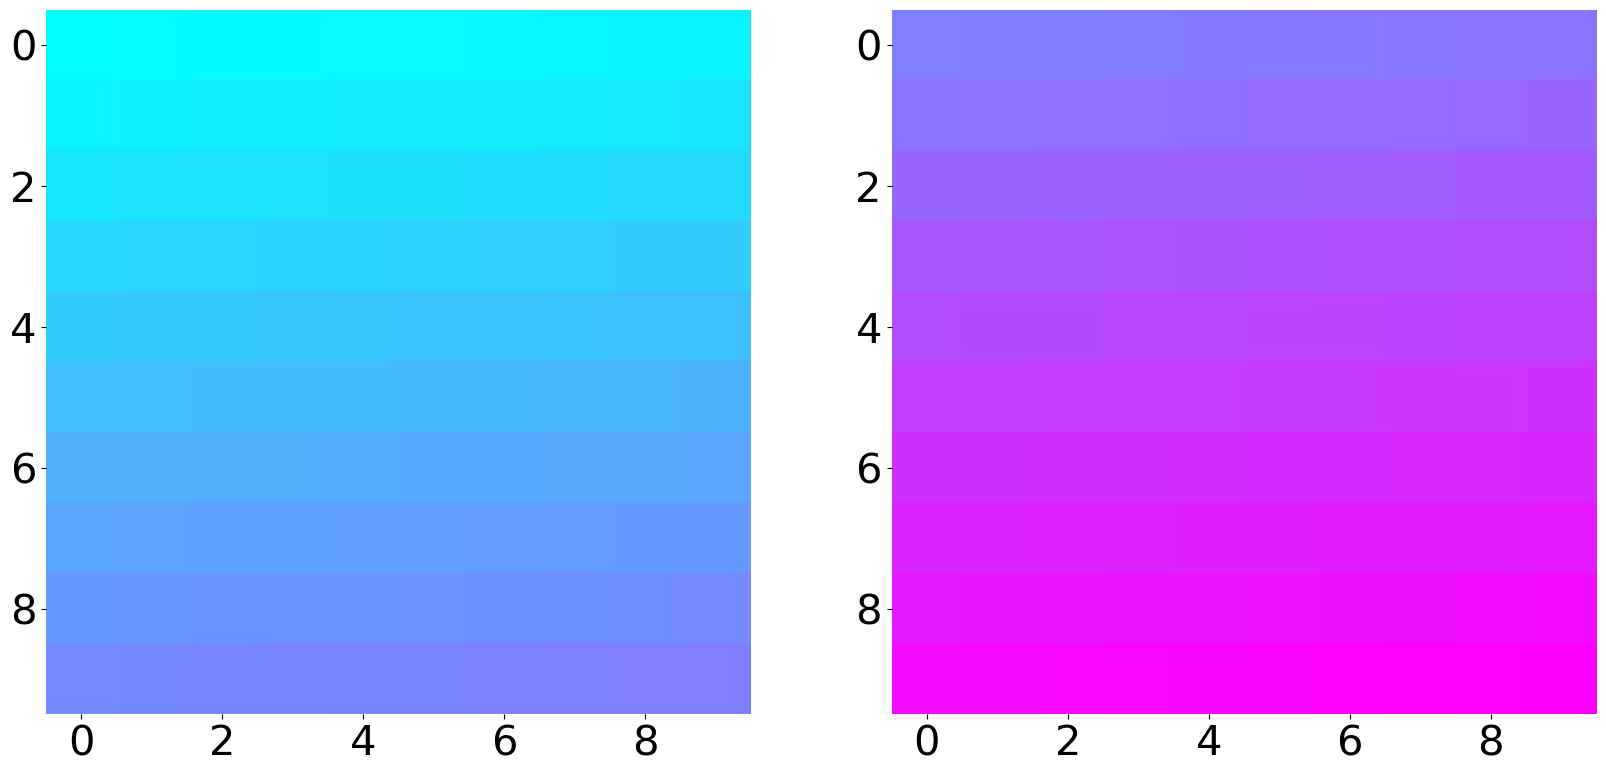

In [36]:




arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)


ax[0].imshow(arr, interpolation='nearest', cmap=new_cmap)
new_cmap = truncate_colormap(cmap, 0.5, 1)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()
